# Plotting both Datasets in one Figure

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the GOFC data more efficiently
GFOC_dir = "/home/dschwarz/Documents/MT/Dataset_MSc/GFOC_RDCDFI.csv"
GFOC_data = pd.read_csv(GFOC_dir, low_memory=True)

# Load the SWMA data more efficiently
SWMA_dir = "/home/dschwarz/Documents/MT/Dataset_MSc/SWMA_RDAWFI.csv"
SWMA_data = pd.read_csv(SWMA_dir, low_memory=True)

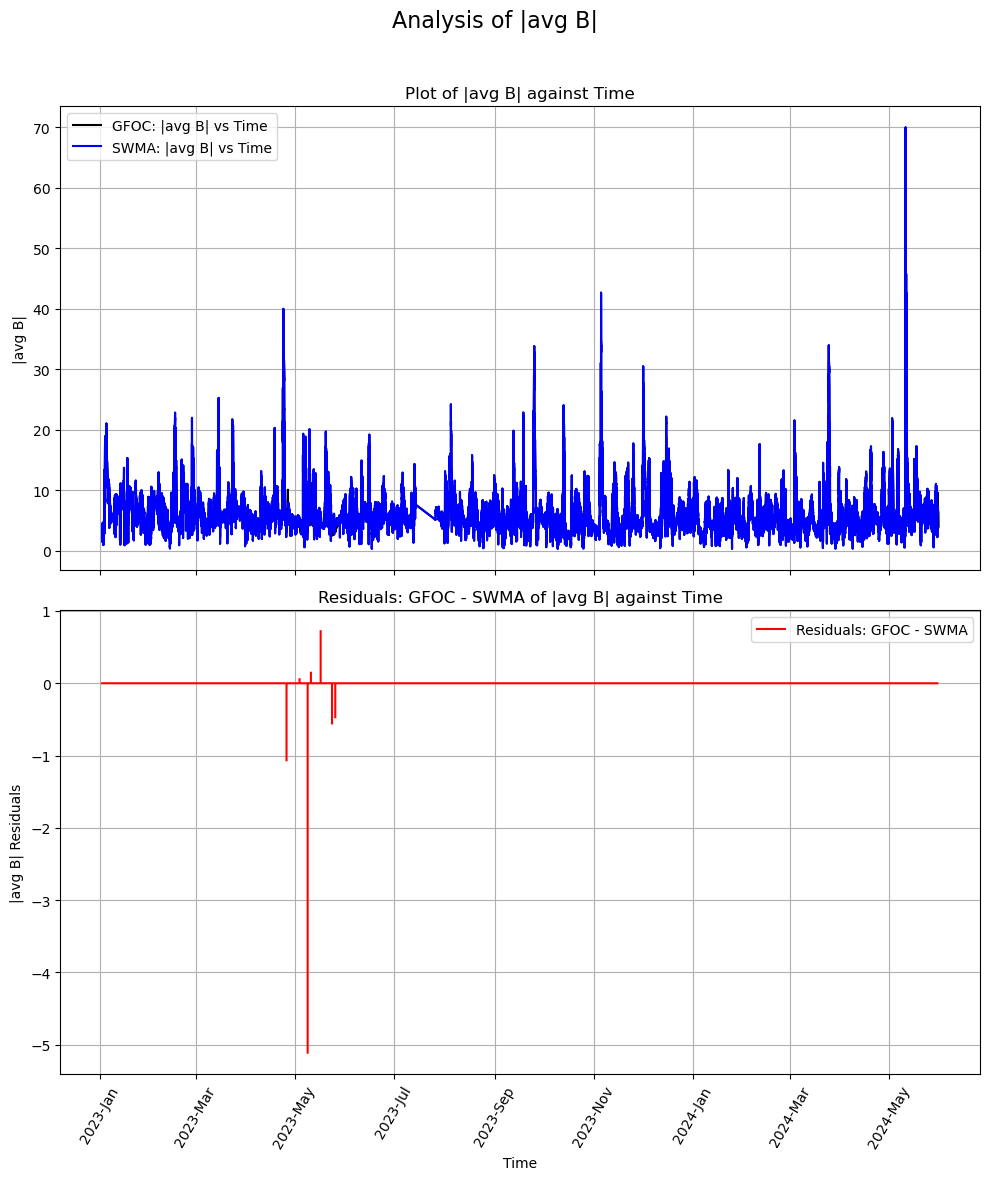

In [ ]:
import matplotlib.dates as mdates

# =========================== 1 & 2 ===================================
start, end = 0, -1  # Define the interval for plotting
feature = '|avg B|'  # Feature to plot
# =====================================================================

# Plot |avg B| against time
plt.figure(figsize=(10, 6))
GFOC_time = GFOC_data['time'][start:end]
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')
plt.plot(GFOC_time, GFOC_data[feature][start:end], 'k', label= 'GFOC: '+feature+' vs Time')
SWMA_time = SWMA_data['time'][start:end]
SWMA_time = pd.to_datetime(SWMA_time, format='%Y-%m-%d %H:%M:%S')
plt.plot(SWMA_time, SWMA_data[feature][start:end], 'b', label= 'SWMA: '+feature+' vs Time')

# ============================= 3 =====================================
# Add an option for monthly, daily, or hourly ticks
tick_interval = 'monthly'  # Change to 'monthly', 'daily', or 'hourly'
tick_step = 2  # Step for the ticks (e.g., every month =1, every 2 months = 2, etc)
# =====================================================================

if tick_interval == 'monthly':
    dtFmt = mdates.DateFormatter('%Y-%b')  # Monthly format
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=tick_step))
elif tick_interval == 'daily':
    dtFmt = mdates.DateFormatter('%Y-%m-%d')  # Daily format
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=tick_step))
elif tick_interval == 'hourly':
    dtFmt = mdates.DateFormatter('%Y-%m-%d %H:%M')  # Hourly format
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=tick_step))
    

plt.gca().xaxis.set_major_formatter(dtFmt)
plt.xticks(rotation=60, fontweight='light',  fontsize='x-small',)
plt.xlabel('Time')
plt.ylabel(feature)
plt.title('Plot of '+feature+' against Time')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

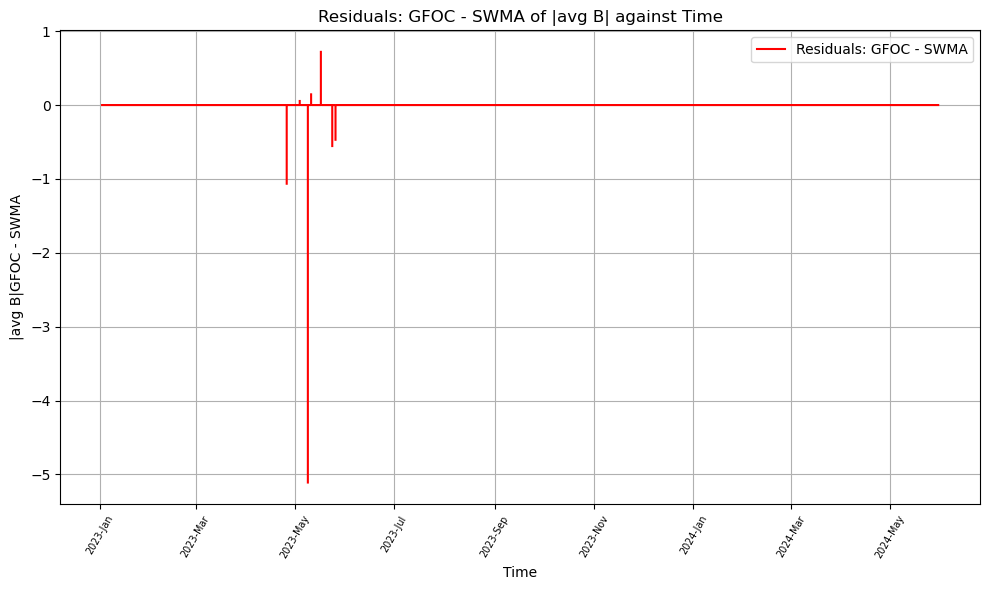

In [ ]:
#Residuals: GFOC - SWMA
residuals = GFOC_data[feature][start:end] - SWMA_data[feature][start:end]
plt.figure(figsize=(10, 6))
plt.plot(GFOC_time, residuals, 'r', label='Residuals: GFOC - SWMA')

if tick_interval == 'monthly':
    dtFmt = mdates.DateFormatter('%Y-%b')  # Monthly format
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=tick_step))
elif tick_interval == 'daily':
    dtFmt = mdates.DateFormatter('%Y-%m-%d')  # Daily format
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=tick_step))
elif tick_interval == 'hourly':
    dtFmt = mdates.DateFormatter('%Y-%m-%d %H:%M')  # Hourly format
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=tick_step))
    

plt.gca().xaxis.set_major_formatter(dtFmt)
plt.xticks(rotation=60, fontweight='light',  fontsize='x-small',)
plt.xlabel('Time')
plt.ylabel(feature+ 'GFOC - SWMA')
plt.title('Residuals: GFOC - SWMA of '+feature+' against Time')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Combined Plot

In [11]:
start, end = 0, -1  # Define the interval for plotting
feature = '|avg B|'  # Feature to plot

# Time conversion
GFOC_time = GFOC_data['time'][start:end]
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')
SWMA_time = SWMA_data['time'][start:end]
SWMA_time = pd.to_datetime(SWMA_time, format='%Y-%m-%d %H:%M:%S')

# Ceck if GFOC_time and SWMA_time are the same
if len(GFOC_time) != len(SWMA_time):
    print("Warning: GFOC_time and SWMA_time have different lengths.")
    print(f"GFOC_time length: {len(GFOC_time)}, SWMA_time length: {len(SWMA_time)}")
else:
    print("GFOC_time and SWMA_time have the same length.")
# Print the first 5 values of GFOC_time and SWMA_time for verification
print("First 3 values of GFOC_time and SWMA_time:") 
print(GFOC_time[0:3])
print(SWMA_time[0:3])
# Print the first 5 values of GFOC_data and SWMA_data for verification
# print("First 5 values of GFOC_data and SWMA_data:")
# print(GFOC_data[feature][start:end].head())
# print(SWMA_data[feature][start:end].head())

# Print the last 5 values of GFOC_time and SWMA_time for verification
print("Last 5 values of GFOC_time and SWMA_time:") 
print(GFOC_time[-5:])
print(SWMA_time[-5:])
print("GFOC time at index 1480317: ", GFOC_time[1480317])

print("\n ---> no gaps in the data. Differences in length are due to the different end dates of the datasets.")

GFOC_time length: 1486078, SWMA_time length: 1480318
First 3 values of GFOC_time and SWMA_time:
0   2023-01-02 12:00:00
1   2023-01-02 12:00:30
2   2023-01-02 12:01:00
Name: time, dtype: datetime64[ns]
0   2023-01-02 12:00:00
1   2023-01-02 12:00:30
2   2023-01-02 12:01:00
Name: time, dtype: datetime64[ns]
Last 5 values of GFOC_time and SWMA_time:
1486073   2024-06-30 11:57:00
1486074   2024-06-30 11:57:30
1486075   2024-06-30 11:58:00
1486076   2024-06-30 11:58:30
1486077   2024-06-30 11:59:00
Name: time, dtype: datetime64[ns]
1480313   2024-05-30 11:56:30
1480314   2024-05-30 11:57:00
1480315   2024-05-30 11:57:30
1480316   2024-05-30 11:58:00
1480317   2024-05-30 11:58:30
Name: time, dtype: datetime64[ns]
GFOC time at index 1480317:  2024-05-30 11:58:30

 ---> no gaps in the data. Differences in length are due to the different end dates of the datasets.


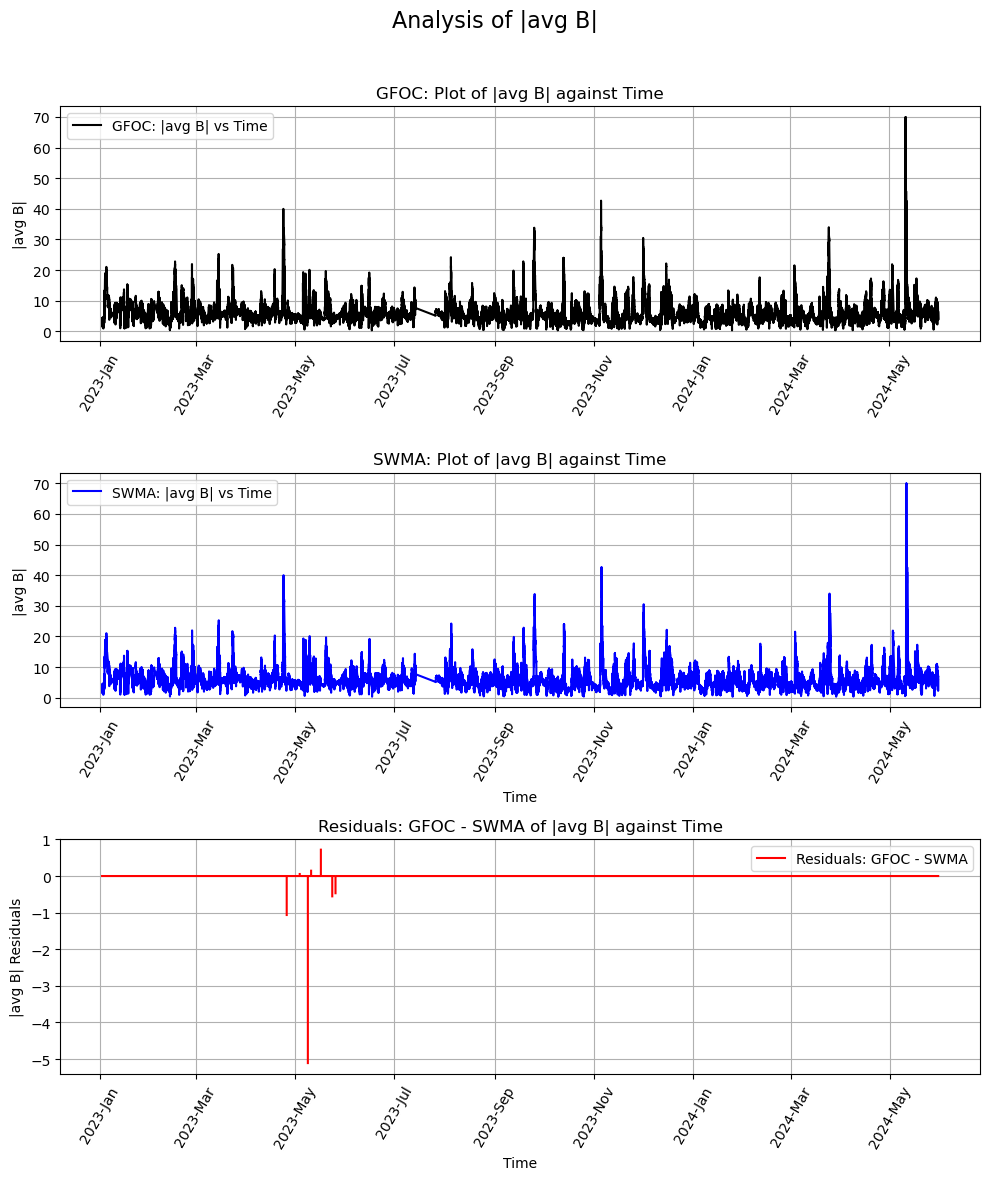

In [ ]:
import matplotlib.dates as mdates

# =========================== Input ===================================
start, end = 0, -1  # Define the interval for plotting
feature = '|avg B|'  # Feature to plot
# Add an option for monthly, daily, or hourly ticks
tick_interval = 'monthly'  # Change to 'monthly', 'daily', or 'hourly'
tick_step = 2  # Step for the ticks (e.g., every month =1, every 2 months = 2, etc)
# =====================================================================

# Time conversion
GFOC_time = GFOC_data['time'][start:end]
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')
SWMA_time = SWMA_data['time'][start:end]
SWMA_time = pd.to_datetime(SWMA_time, format='%Y-%m-%d %H:%M:%S')

#Residuals: GFOC - SWMA
residuals = GFOC_data[feature][start:end] - SWMA_data[feature][start:end]

# Helper function for tick formatting
def format_ticks(ax, tick_interval, tick_step):
    if tick_interval == 'monthly':
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    elif tick_interval == 'daily':
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    elif tick_interval == 'hourly':
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.tick_params(axis='x', rotation=60)

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot |avg B| against time for GFOC_data
axs[0].plot(GFOC_time, GFOC_data[feature][start:end], 'k', label='GFOC: ' + feature + ' vs Time')
axs[0].set_title('GFOC: Plot of ' + feature + ' against Time')
axs[0].set_ylabel(feature)
axs[0].legend()
axs[0].grid()
format_ticks(axs[0], tick_interval, tick_step)

# Plot |avg B| against time for SWMA_data
axs[1].plot(SWMA_time, SWMA_data[feature][start:end], 'b', label='SWMA: ' + feature + ' vs Time')
axs[1].set_title('SWMA: Plot of ' + feature + ' against Time')
axs[1].set_ylabel(feature)
axs[1].legend()
axs[1].grid()
format_ticks(axs[1], tick_interval, tick_step)

# Plot residuals against time
axs[2].plot(GFOC_time, residuals, 'r', label='Residuals: GFOC - SWMA')
axs[2].set_title('Residuals: GFOC - SWMA of ' + feature + ' against Time')
axs[2].set_ylabel(feature + ' Residuals')
axs[2].legend()
axs[2].grid()
format_ticks(axs[2], tick_interval, tick_step)

# Set the figure title
fig.suptitle('Analysis of ' + feature, fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()
